# Лабораторная работа №1

## по курсу "Системы аналитических вычислений"

### студент: Ляшун Д.С.

<h1>Задание 1 - часть 1 - Квадратик</h1>

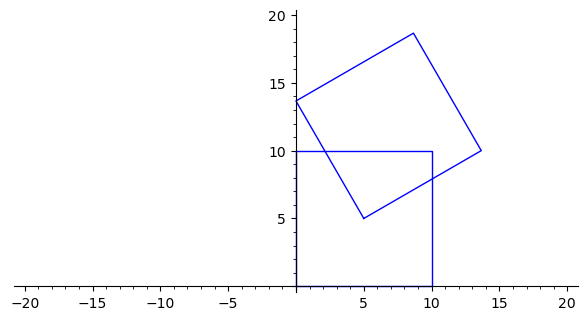

In [41]:
import math
a = 10
rectangle_src = matrix([[0, 0], [0, a], [a, a], [a, 0], [0, 0]])
alpha = math.radians(30)
mat_rot = matrix([
    [cos(alpha), sin(alpha)]
    , [ -sin(alpha), cos(alpha)]
])
rectangle_rotated =  rectangle_src * mat_rot
def matrix_shift(matrix, x, y):
    return [[row[0]+x, row[1]+y] for row in matrix]
rectangle_shift = matrix_shift(rectangle_rotated, 5, 5)
show(
    line(rectangle_src)
    + line(rectangle_shift)
    , xmin=-20, xmax=20, ymin=0, ymax=20, aspect_ratio=1)


<h1>Задание 1 - Часть 2 - Исследование функции</h1>

## Варианты:

In [2]:
tasks = [ 
            sin(2*x**3)**2/x**3  # исправлен
            , (x**2 - 4)*sin((pi*(x**2))/6) / (x**2 - 1)
            , sqrt(abs(3*x^3 + 2*x^2 - 10*x)) / (4*x)
            , 1/2 * ln(sqrt(x^2 + 1) / sqrt(x^2 - 1)) - 15*x**2
            , (x^3 - x^2 - x + 1)^(1/3) / tan(x)
            , 2*log((x - 1) / x) + 1
            , ln(x - 1) / (x - 1)^2
        ]

In [3]:
def get_variant_for_number(_number, _variations_quo):
    return (_number - 1) % _variations_quo


your_number = 13  # сюда вбить ваш номер по списку в рейтинге 
number_of_your_task = get_variant_for_number(_number=your_number, _variations_quo=len(tasks))
print(f"Номер вашего задания: {number_of_your_task}.")
show("Ваша функция: ", tasks[number_of_your_task])

Номер вашего задания: 5.


'Ваша функция: ' 2*log((x - 1)/x) + 1

## 1. Область определения

In [66]:
y = tasks[number_of_your_task]
g1(x) = (x-1)/x
g2(x) = x
domain = solve(g1 > 0, x)
answer = ""
for i, value in enumerate(domain):
    answer += str(value)+("∪" if i+1 != len(domain) else "")
show("D(y): ", answer)

'D(y): ' '[x < 0]∪[x > 1]'

## 2. Является ли функция четной или нечетной, является ли периодической
### Четность

In [12]:
g = y(x)- y(-x)
g.expand().simplify()
show(LatexExpr("y(x) - y(-x) = "+str(g)))
g = y(x)+ y(-x)
g.expand().simplify()
show(LatexExpr("y(x) + y(-x) = "+str(g)))

y(x) - y(-x) = -2*log((x + 1)/x) + 2*log((x - 1)/x)

y(x) + y(-x) = 2*log((x + 1)/x) + 2*log((x - 1)/x) + 2

$y(x)-y(-x)\neq 0$ и $y(x)+y(-x)\neq 0$, поэтому функция не является ни четной, ни нечетной.

### Периодичность

In [5]:
var("T")
g = y(x) - y(T + x)
show(g==0)
simplify(g)
solution_period = solve(g==0, T)
show(*solution_period)

-2*log((T + x - 1)/(T + x)) + 2*log((x - 1)/x) == 0

T == 0

Поскольку уравнение имеет решение только при $T = 0$, получаем, что функция не является периодической.

## 3. Точки пересечения графика с осями координат

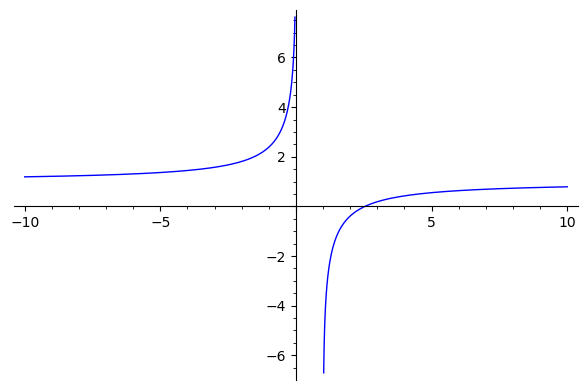

In [49]:
plot(y, xmin = -10.0, xmax = 10.0)

### Пересечение с осью OX

In [32]:
solutions = solve(y == 0, x)
for i, val in enumerate(solutions):
    show(LatexExpr("x_{"+ str(i+1) + "} = " + str(float(val.rhs().n()))))

x_{1} = 2.5414940825367984

### Пересечение с осью OY

При $x = 0$ функция не определена.

## 4. Промежутки знакопостоянства

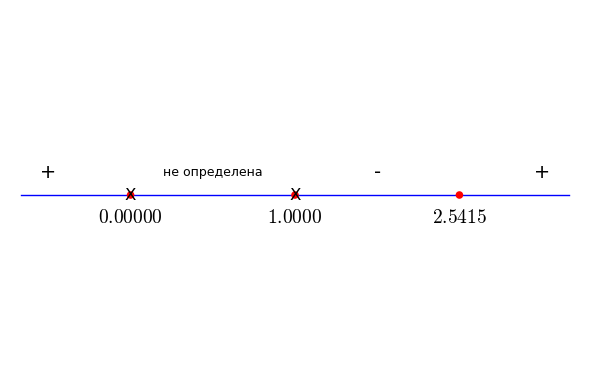

In [33]:
# отдельный список для точек разрыва чтобы отмечать их на промежутке
roots_null = [val.rhs().n(digits=5) for val in solve(g1 == 0, x) + solve(g2 == 0, x)]

points = sorted(roots_null+[val.rhs().n(digits=5) for val in solutions])

# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=-0.2, xmax=0.8, ymin=-0.2, ymax=0.2)

# добавление красных маркеров - отметки точек\маркеров
for i in range(len(points)):
    intervals_of_constancy  += point((0+0.3*i, 0), color="red", size=30, zorder=10)

y_margin = 0.025  # смещение по оси Y элемента подписи, чтобы он не наслаивался на линию
# здесь добавляем подписи точек (значения по оси X)
for i, value in enumerate(points):
    intervals_of_constancy  += text("${"+str(value)+"}$", (0+0.3*i, -y_margin), color="black", fontsize=14)
    if value in roots_null:
        intervals_of_constancy  += text("X", (0+0.3*i, 0), color="black", fontsize=12, zorder = 11)
    
def getSign(val):
    return "+" if val > 0 else "-"

gen = (0.15*i for i in range(-1, 6, 2))
eps = 0.05

# Здесь добавляем подписи знаков промежутков знакопостоянства

intervals_of_constancy  += text(getSign(y(points[0]-eps)), (next(gen), y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("не определена", (next(gen), y_margin), color="black", fontsize=9)
intervals_of_constancy  += text(getSign(y((points[1]+points[2])/2)), (next(gen), y_margin), color="black", fontsize=14)
intervals_of_constancy  += text(getSign(y(points[2]+eps)), (next(gen), y_margin), color="black", fontsize=14)

# оси не нужны - скрываем
intervals_of_constancy.show(axes=False)

## 5. Промежутки возрастания и убывания

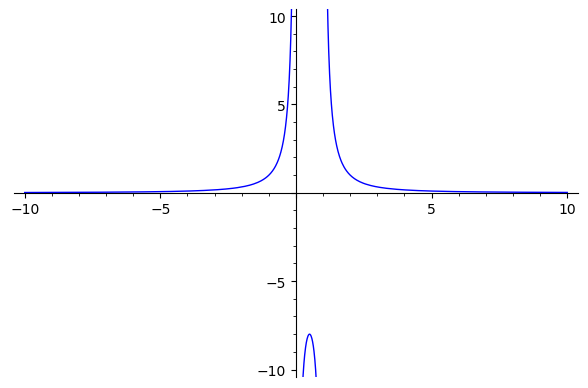

In [43]:
y_d = diff(y(x))
plot(y_d, xmin = -10.0, xmax = 10.0, ymin = -10.0, ymax = 10.0, exclude = roots_null)

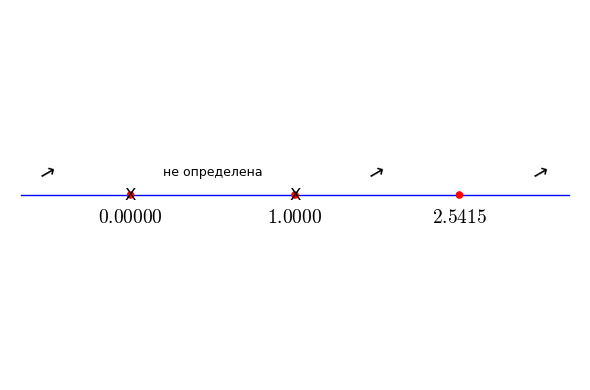

In [42]:
roots_null += [val.rhs().n(digits=5) for val in solve(y_d == 0, x)]
# отрисовка отрезка - основная линия для графика промежутков знакопостоянства
intervals_of_constancy = plot(0, xmin=-0.2, xmax=0.8, ymin=-0.2, ymax=0.2)

# добавление красных маркеров - отметки точек\маркеров
for i in range(len(points)):
    intervals_of_constancy  += point((0+0.3*i, 0), color="red", size=30, zorder=10)

y_margin = 0.025  # смещение по оси Y элемента подписи, чтобы он не наслаивался на линию
# здесь добавляем подписи точек (значения по оси X)
for i, value in enumerate(points):
    intervals_of_constancy  += text("${"+str(value)+"}$", (0+0.3*i, -y_margin), color="black", fontsize=14)
    if value in roots_null:
        intervals_of_constancy  += text("X", (0+0.3*i, 0), color="black", fontsize=12, zorder = 11)
    
def getRotation(val):
    return 30 if val > 0 else -30

gen = (0.15*i for i in range(-1, 6, 2))
eps = 0.05

# Здесь добавляем подписи знаков промежутков знакопостоянства

intervals_of_constancy  += text("→", rotation = getRotation(y_d(points[0]-eps)), xy= (next(gen), y_margin), color="black", fontsize=14) 
intervals_of_constancy  += text("не определена", xy=(next(gen), y_margin), color="black", fontsize=9)
intervals_of_constancy  += text("→", rotation = getRotation(y_d((points[1]+points[2])/2)), xy =(next(gen), y_margin), color="black", fontsize=14)
intervals_of_constancy  += text("→", rotation = getRotation(y_d(points[2]+eps)),xy= (next(gen), y_margin), color="black", fontsize=14)

# оси не нужны - скрываем
intervals_of_constancy.show(axes=False)

## 6. Точки экстремума и значения в этих точках

In [68]:
extremes = solve(y_d == 0, x)
if len(extremes)==0:
    show("Точек экстремума нет.")
else:
    show("Точки экстремума: ")
    for i, val in enumerate(extremes):
        show(LatexExpr("x_{"+ str(i+1) + "} = " + val))

'Точек экстремума нет.'

## 7. Непрерывность. Наличие точек разрыва и их классификация.

In [69]:
for i, root in enumerate(roots_null):
    lim_left = lim(y, x = root, dir = 'left')
    lim_right = lim(y, x = root, dir = 'right')
    if (lim_left == lim_right and abs(lim_left) != oo and abs(lim_right) != oo):
        show(LatexExpr("x_" + str(i+1) + " = " + str(root)), " разрыв первого рода")
    else:
        show(LatexExpr("x_" + str(i+1) + " = " + str(root)), " разрыв второго рода")

x_1 = 1.0000 ' разрыв второго рода'

x_2 = 0.00000 ' разрыв второго рода'

## 8. Асимптоты

In [50]:
lim_inf_right = lim(y, x = +oo)
show(LatexExpr(r'\lim_{x \to +\infty} y(x) = ') + str(lim_inf_right.simplify_full()))
lim_inf_left = lim(y, x = -oo)
show(LatexExpr(r'\lim_{x \to -\infty} y(x) = ') + str(lim_inf_left.simplify_full()))

\lim_{x \to +\infty} y(x) = 1

\lim_{x \to -\infty} y(x) = 1

Имеем асимптоту $y=1$, а также вертикальные асимптоты в точках разрыва $x = 0$ и $x=1$.

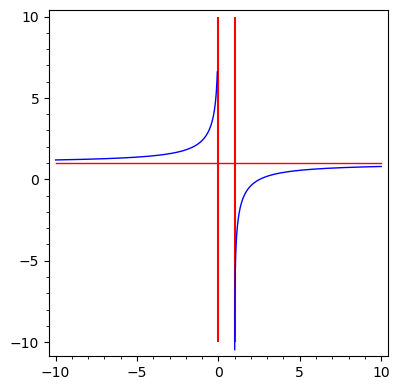

In [58]:
plot(y, xmin = -10.0, xmax = 10.0)+plot(1, xmin = -10.0, xmax = 10.0, color="red")+implicit_plot(x==0,(x,-10,10),(y,-10,10), color="red")+implicit_plot(x==1, (x, -10, 10), (y,-10, 10), color="red")